# R-statistic

We start by writing up some functions for level spacing and performing the r-statistic on a list of floats

In [1]:
def level_spaces(lst):
    return [abs(lst[i]-lst[i+1]) for i in range(len(lst)-1)] + [lst[len(lst)-1]- lst[0]]
def r_stat(spaces):
    return [min(spaces[i:i+2])/max(spaces[i:i+2]) for i in range(len(spaces))]

lst = [1,6,4,2]
spaces = level_spaces(lst)
r = r_stat(spaces)
print('List = ', lst,'\nSpaces = ', spaces, '\nr = ',r)

List =  [1, 6, 4, 2] 
Spaces =  [5, 2, 2, 1] 
r =  [0.4, 1.0, 0.5, 1.0]


We then apply it to the the GOE and Possoin distribution, as to see if we made a mistake

In [2]:
from math import factorial
import numpy as np

poisson = [np.exp(-mu)*mu**k/factorial(k) for k in range(10)]
plt.plot(range(10), poisson)
#r_stat(poisson)

NameError: name 'mu' is not defined

Next up lets look at using MBL data

In [3]:

import matplotlib.pyplot as plt
from tqdm import tqdm

def load_vals(filename='results1/results-L-2-W-0.1-seed-0.npz'):
    data = np.load(filename)
    eigvals = data[data.files[0]]
    return eigvals

location = '/Users/antongolles/results1/results'

Ls = [6,8,10,12]
ws = [0.3, 0.6, 0.8999999999999999, 1.2,  1.5, 1.8,
                      2.0999999999999996, 2.4, 2.6999999999999997, 
                      2.9999999999999996, 3.3, 3.5999999999999996, 
                      3.8999999999999995, 4.2, 4.5, 4.8, 5.1, 
                      5.3999999999999995, 5.699999999999999, 6.0]
num_seeds = 1000
r_for_Ls = []
for L in Ls:
    r_for_ws = []
    for w in tqdm(ws):
        r_for_seeds = []
        for seed in range(num_seeds):
            file = location+'-L-{}-W-{}-seed-{}.npz'.format(L,w,seed)
            lst = load_vals(file)
            spaces = level_spaces(lst)
            r = r_stat(spaces)
            r_for_seeds.append(np.mean(r))
        r_for_ws.append(np.mean(r_for_seeds))
    r_for_Ls.append(r_for_ws)

r_for_Ls = np.array(r_for_Ls)

100%|██████████| 20/20 [04:15<00:00, 12.79s/it]


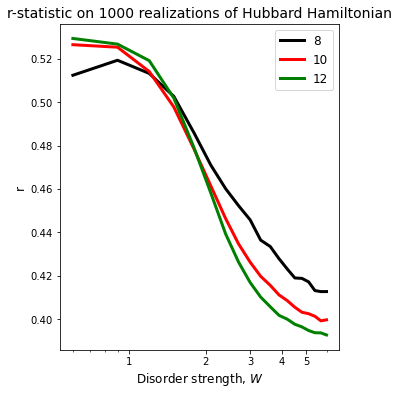

In [5]:
plt.figure(figsize=(5,6))

colors = 'black, red, green, orange,lightblue,  black, red'.split(', ')
for index, L in enumerate(Ls[1:]):
    plt.plot(ws[1:], r_for_Ls[1+index][1:], label=L,
            lw=3, c=colors[index])

mu=1



plt.legend(fontsize=12)
plt.title('r-statistic on {} realizations of Hubbard Hamiltonian'.format(num_seeds), fontsize=14)
plt.ylabel('r', fontsize=12)
plt.xlabel('Disorder strength, $W$', fontsize=12)
#plt.show()

plt.xscale('log' )
plt.xticks([1,2,3,4,5], [1,2,3,4,5])
#plt.grid()

#plt.show()
plt.savefig('figures/R_stat.png', dpi=500, bbox_inches='tight')

where does 8 first cross 10

([<matplotlib.axis.XTick at 0x117626be0>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5')])

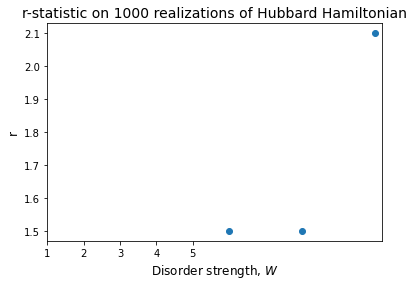

In [30]:

def func(i,index):
    if i == True:
        return index

crossings = []
for j in range(len(Ls)-1):
    larger_than_prev =[func(i, index) for index, i in enumerate(np.array(r_for_Ls[j+1]) - np.array(r_for_Ls[j])< 0)]
    crossing_index = min(x for x in larger_than_prev if x is not None)
    crossings.append(ws[crossing_index])

plt.scatter(Ls[:len(Ls)-1], crossings)


plt.title('r-statistic on {} realizations of Hubbard Hamiltonian'.format(num_seeds), fontsize=14)
plt.ylabel('r', fontsize=12)
plt.xlabel('Disorder strength, $W$', fontsize=12)
#plt.show()


plt.xticks([1,2,3,4,5], [1,2,3,4,5])
#plt.grid()

#plt.show()
#plt.savefig('figures/R_stat.png', dpi=500, bbox_inches='tight')
